In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [3]:
db = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
db.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37433,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


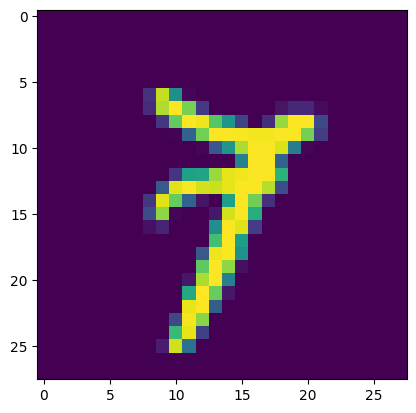

In [5]:
plt.imshow(db.iloc[40003,1:].values.reshape(28,28))

In [6]:
x = db.iloc[:,1:]
y = db.iloc[:,0:1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [10]:
y_pred = knn.predict(x_test)

In [11]:
score = accuracy_score(y_pred,y_test)

In [12]:
print(f" Accuracy before PCA: {score}")

 Accuracy before PCA: 0.964952380952381


In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [15]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f" Accuracy after PCA: {score}")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Accuracy after PCA: 0.3199047619047619


In [16]:
y_train = y_train.astype(str).squeeze()
plot = px.scatter(
    x=x_train[:,0],
    y=x_train[:,1],
    color=y_train,
    color_discrete_sequence=px.colors.qualitative.G10
)

In [17]:
plot.show()